# GMM

En este _notebook_ exploraremos el uso de la técnica _Gaussian Mixture Models_ para hacer _clustering_. La idea es poder entender cómo usar este modelo con la librería Scikit Learn, cómo encontrar _outliers_ y entender el grafo de densidad de probabilidades.

## Cargando el dataset

Vamos a partir creando un _dataset_ que tiene 3 clusters.

In [6]:
from sklearn.datasets import make_blobs
import pandas as pd

clusters = make_blobs(
    n_samples=100,
    centers=[(0, 0), (3, 1), (4, 7)], 
    cluster_std=[0.3, 0.5, 0.7]
)
X = pd.DataFrame(clusters[0], columns=["Dimension 1", "Dimension 2"])
X

,Dimension 1,Dimension 2
0,3.440016,1.226484
1,4.428736,7.779860
2,4.096729,6.382363
3,2.585522,0.625648
4,4.456456,8.539117
...,...,...
95,3.358592,1.061464
96,4.069784,7.482942
97,2.878438,1.567649
98,4.165975,7.336527


Vamos a visualizar el _dataset_.

<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

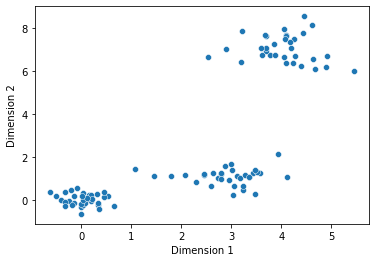

In [7]:
import seaborn as sns

sns.scatterplot(data=X, x="Dimension 1", y="Dimension 2")

Ahora vamos a entrenar un modelo GMM para hacer _clustering_ del _dataset_.

In [8]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=8)
gm.fit(X)

GaussianMixture(n_components=3, n_init=8)

Ahora podemos revisar los parámetros de las 3 distribuciones normales.

In [9]:
gm.weights_

array([0.33000603, 0.33      , 0.33999397])

In [10]:
gm.means_

array([[2.91376246, 1.08545666],
       [4.04093501, 7.04639508],
       [0.0271932 , 0.01821283]])

In [11]:
gm.covariances_

array([[[ 0.41300116,  0.00342491],
        [ 0.00342491,  0.14194061]],

       [[ 0.34056296, -0.06039824],
        [-0.06039824,  0.40486404]],

       [[ 0.08996599, -0.01050872],
        [-0.01050872,  0.07587888]]])

También podemos preguntar si el algoritmo pudo converger.

In [12]:
gm.converged_

True

Ahora vamos a predecir y vamos a visualizar los _clusters_.

In [13]:
# Primero vemos las probabilidades de pertenencia de cada elemento

gm.predict_proba(X)

array([[1.00000000e+000, 2.59331747e-020, 1.08074932e-035],
       [1.27940619e-069, 1.00000000e+000, 1.35486829e-245],
       [8.10902243e-044, 1.00000000e+000, 7.19714086e-176],
       [1.00000000e+000, 1.86508227e-026, 4.71124873e-018],
       [4.69198262e-085, 1.00000000e+000, 1.41450779e-283],
       [6.90443446e-009, 1.30277692e-049, 9.99999993e-001],
       [1.40838899e-046, 1.00000000e+000, 2.16623611e-153],
       [4.44047177e-066, 1.00000000e+000, 2.69004168e-220],
       [1.00000000e+000, 5.69431606e-025, 6.95869425e-025],
       [3.62668958e-008, 5.28409445e-047, 9.99999964e-001],
       [3.22517747e-049, 1.00000000e+000, 5.64048556e-182],
       [5.58521885e-007, 2.98443143e-044, 9.99999441e-001],
       [1.00000000e+000, 1.84065564e-023, 3.99565941e-023],
       [1.00000000e+000, 4.17325400e-020, 2.60219127e-030],
       [5.67334401e-007, 1.33905779e-044, 9.99999433e-001],
       [1.00000000e+000, 1.63013701e-023, 4.32081791e-020],
       [3.49790730e-007, 2.55244414e-044

In [14]:
# Y ahora vamos a predecir

y_pred = gm.predict(X)
y_clusters = pd.DataFrame(y_pred, columns=["Cluster"])
y_clusters

,Cluster
0,0
1,1
2,1
3,0
4,1
...,...
95,0
96,1
97,0
98,1


In [15]:
# Ahora a visualizar

df = X.join(y_clusters)
df

,Dimension 1,Dimension 2,Cluster
0,3.440016,1.226484,0
1,4.428736,7.779860,1
2,4.096729,6.382363,1
3,2.585522,0.625648,0
4,4.456456,8.539117,1
...,...,...,...
95,3.358592,1.061464,0
96,4.069784,7.482942,1
97,2.878438,1.567649,0
98,4.165975,7.336527,1


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

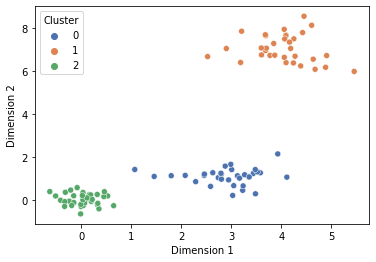

In [16]:
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cluster", palette="deep")

Como vemos, cada punto pertenece al _cluster_ que teenía una mayor probabilidad. Sin embargo, recordemos que este método sirve para hacer _soft clustering_, es decir, al revisar las probabilidades podemos entender que un punto podría pertenecer a más de un _cluster_ a la vez.

## Graficando las distribuciones

Ahora vamos a graficar las distribuciones de probabilidad. La idea es visualizar en qué zonas la función de densidad de probabilidad es mayor. Ojo, esto ocurre en los centros, donde se ubican las medias.

**Ojo**: la función de más abajo, `score_samples` estima el logaritmo de la función de densidad de probabilidad en el punto. Para obtener el valor de la densidad, debemos usar la función exponencial.

In [17]:
# Para obtener la densidad de probabilidad en cada punto hacemos esto
proba = gm.score_samples(X)
proba

array([-1.92918138, -2.9796707 , -2.48982823, -2.39465086, -5.30850687,
       -3.51655387, -5.85042458, -2.47113131, -2.19319682, -0.90774555,
       -2.2267892 , -0.60935524, -1.574711  , -1.89962044, -1.22756874,
       -1.79054151, -0.7443316 , -2.14008781, -2.52913362, -3.38949915,
       -3.48061762, -0.87250893, -3.67432701, -1.56722941, -2.67180925,
       -1.17054944, -2.16023363, -2.1598298 , -2.04163183, -2.84795594,
       -2.16458035, -1.82192392, -1.57758639, -6.59506304, -2.54069895,
       -4.294008  , -3.84373295, -2.1988628 , -0.93270062, -1.58512086,
       -1.73497894, -2.06771713, -6.05618095, -2.40866142, -2.1298175 ,
       -4.10007855, -2.11346715, -2.23083896, -4.16575168, -0.46253391,
       -0.58987502, -2.86288755, -0.77654635, -1.66089276, -1.35438785,
       -2.15770269, -2.11850664, -1.32159073, -2.40650589, -1.62729948,
       -5.75983837, -2.1204364 , -1.27465994, -1.97532159, -1.59773785,
       -1.62554189, -1.10759474, -0.91011514, -0.80023359, -1.05

<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

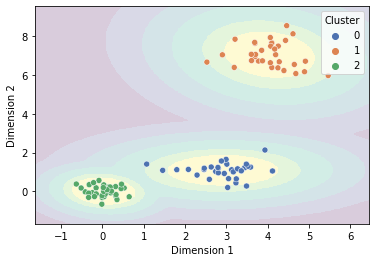

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

pallete_back = sns.color_palette("viridis", as_cmap=True)

x_min, x_max = X["Dimension 1"].min() - 1, X["Dimension 1"].max() + 1
y_min, y_max = X["Dimension 2"].min() - 1, X["Dimension 2"].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

proba = gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
proba = np.exp(proba)

p_20 = np.percentile(proba, 20)
p_40 = np.percentile(proba, 40)
p_60 = np.percentile(proba, 60)
p_80 = np.percentile(proba, 80)
p_90 = np.percentile(proba, 90)

proba_copy = np.zeros(len(proba))
for i in range(len(proba)):
    if proba[i] <= p_20:
        proba_copy[i] = 0
    elif proba[i] <= p_40:
        proba_copy[i] = 1
    elif proba[i] <= p_60:
        proba_copy[i] = 2
    elif proba[i] <= p_80:
        proba_copy[i] = 3
    elif proba[i] <= p_90:
        proba_copy[i] = 4
    else:
        proba_copy[i] = 5
    
        
Z = proba_copy.reshape(xx.shape)
plt.figure()

plt.pcolormesh(xx, yy, Z, cmap=pallete_back, shading='auto', alpha=0.2)
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cluster", palette="deep")

De esta forma podemos entender las zonas donde cada una de las distribuciones tiene un mayor valor en su función de densidad, que es el lugar donde está la media. De la misma forma, para detectar outliers, podemos ver los elementos que están en zonas de baja densidad.